In [83]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# 5 Analisis de los proyectos con zona protegidas

## 5.1 Cargo los avances de la parte 1

In [84]:
%%time
df=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/avance1.xlsx")
print (df.shape[0])
df.head()

26688


,name,type,region,owner,typology,typology_des,investment,entry_date,qualification_date,id_project,...,n_docs,n_addendum,n_participatory,main_url,diferencia,state,state_new,Region,zona,año
0,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4,2021-03-09,2021-08-17,2151031299,...,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desistido,Desaprobado,Región de Los Lagos,Zona sur,2021
1,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5,2021-03-05,2021-08-13,2150963916,...,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado,Aprobado,Región de La Araucanía,Zona sur,2021
2,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0,2021-03-02,2021-08-10,2150897519,...,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado,Aprobado,Región Metropolitana de Santiago,Zona centro,2021
3,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0,2021-02-25,2021-08-05,2150870379,...,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desistido,Desaprobado,Región de Valparaíso,Zona centro,2021
4,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0,2021-02-24,2021-08-04,2150870374,...,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desistido,Desaprobado,Región de Valparaíso,Zona centro,2021


## 5.2 Cargo las zonas protegidas de chile

In [85]:
datos_protegido=gpd.read_file("C:/Users/crist/Downloads/Snaspe.zip")
datos_protegido


,objectid,st_area_sh,st_length_,Nombre,Tipo_Snasp,Region,Cod_Region,geometry
0,10921,1.970656e+09,1.388746e+06,P.N.Cabo de Hornos,Parque,Región de Magallanes y Antártica Chilena,12,"MULTIPOLYGON (((-7499543.521 -7472699.191, -74..."
1,10150,2.663508e+02,2.139039e+02,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-7717793.718 -7290127.662, -7717723...."
2,10142,3.143100e+04,9.173960e+02,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-7948929.157 -7162664.662, -7948951...."
3,10129,4.558119e+04,8.557300e+02,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-7953613.979 -7169386.636, -7953666...."
4,10126,3.025963e+05,2.331806e+03,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-7948899.703 -7162143.158, -7948928...."
...,...,...,...,...,...,...,...,...
132,12469,5.376587e+09,1.192382e+06,Parque Pumalín,Parque,Región de Los Lagos,10,"MULTIPOLYGON (((-8042694.640 -5235224.003, -80..."
133,12471,7.210095e+07,1.238586e+05,Parque Nacional Rapa Nui,Parque,Región de Valparaíso,5,"POLYGON ((-12177090.007 -3130867.041, -1217708..."
134,12473,1.455558e+07,1.538017e+04,Parque Nacional Rapa Nui,Parque,Región de Valparaíso,5,"POLYGON ((-12182937.223 -3143895.870, -1218270..."
135,12472,1.234812e+06,4.720501e+03,Parque Nacional Rapa Nui,Parque,Región de Valparaíso,5,"POLYGON ((-12178144.007 -3141576.637, -1217817..."


## 5.3 Transformo los datos

In [86]:
datos_protegido["geometry"]=datos_protegido["geometry"].to_crs("EPSG:4326")

In [87]:
datos_protegido["geometry"].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 5.4 Creo un punto para latitud y longitud

In [88]:
df = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df["longitude"], df["latitude"]))
#df = gpd.to_crs(epsg=3857)

## 5.5 Calculo distancia entre proyecto con zonas protegidas

In [8]:
data=pd.DataFrame()
for i in range(len(df)):
    lista=[]
    for y in range(len(datos_protegido)):
        distancia=datos_protegido.geometry[y].distance(df["geometry"].iloc[i])
        lista.extend([distancia]+[datos_protegido["st_area_sh"].iloc[y]]+[datos_protegido["Tipo_Snasp"].iloc[y]]+[df["id_project"].iloc[i]] )
    data1=pd.DataFrame(np.array(lista).reshape(137,4))
    data1= data1[data1[0]==data1[0].min()]#.min()
    data=pd.concat([data,data1])
data.columns=["distancia","area","tipo parque","id_project"]

In [9]:
data.to_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/distancia_zona_protegida.xlsx")

In [89]:
data=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/distancia_zona_protegida.xlsx")
data=data.iloc[:,1:]
data

,distancia,area,tipo parque,id_project
0,0.519918,4.244166e+08,Parque,2151031299
1,0.588894,8.959195e+08,Parque,2150963916
2,0.100249,8.833890e+07,Reserva,2150897519
3,0.243114,7.439927e+07,Reserva,2150870379
4,0.215851,1.386633e+08,Reserva,2150870374
...,...,...,...,...
26683,0.073709,2.967155e+07,Reserva,885
26684,0.388454,8.833890e+07,Reserva,1036
26685,0.253400,2.967155e+07,Reserva,903427
26686,0.304920,3.272811e+09,Parque,3023


In [90]:
df=pd.merge(df,data,on="id_project")

<AxesSubplot:ylabel='Frequency'>

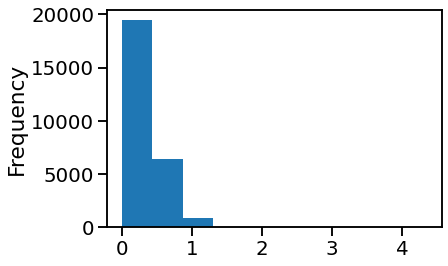

In [91]:
df["distancia"].plot(kind="hist")

## 5.6 Grafico de distancia, inversión y estado del proyecto

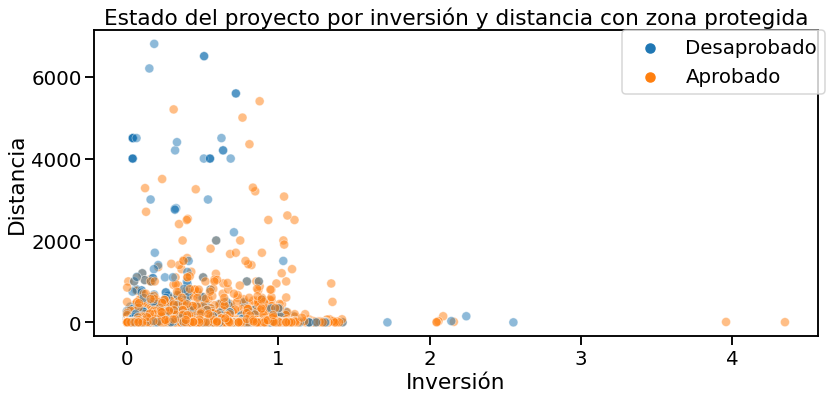

In [92]:
sb.set_context("talk", font_scale=1.2) 
plt.figure(figsize=(12, 6)) 
sb.scatterplot(x='distancia', 
                y='investment',                
                sizes=(20, 500), 
                alpha=0.5, 
                hue='state_new', 
                data=df) 
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) 
  
plt.xlabel("Inversión") 
plt.ylabel("Distancia") 
plt.title("Estado del proyecto por inversión y distancia con zona protegida") 
plt.tight_layout()


In [93]:
df.describe()

,investment,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,diferencia,año,distancia,area
count,26688.000000,2.668800e+04,26688.000000,26688.000000,26688.000000,26688.000000,26688.000000,26688.000000,26688.000000,26688.000000,2.668800e+04
mean,27.060805,5.323014e+08,-36.009615,-71.656049,35.280613,0.943982,0.064149,191.017798,2008.969499,0.321950,2.495768e+09
std,200.240848,9.216425e+08,7.723664,1.571493,42.546860,1.063102,0.955843,217.795588,6.142813,0.234891,7.436284e+09
min,0.000000,1.000000e+01,-55.966667,-109.439249,1.000000,0.000000,0.000000,-6.000000,1993.000000,0.000000,1.038839e+04
25%,0.125000,2.680452e+05,-41.676378,-72.908683,5.000000,0.000000,0.000000,68.000000,2004.000000,0.148277,4.893071e+07
50%,1.195200,3.270302e+06,-35.018393,-71.395048,32.000000,1.000000,0.000000,160.000000,2009.000000,0.303301,1.757586e+08
75%,7.000000,8.356184e+06,-33.046854,-70.670366,53.000000,2.000000,0.000000,249.000000,2014.000000,0.447490,7.054795e+08
max,6800.000000,2.151031e+09,-17.596368,-67.058810,1796.000000,8.000000,57.000000,6000.000000,2021.000000,4.349724,9.209879e+10


# Parte 6 - Modelo supervisado - Clasificación

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score,plot_roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 6.1 Seleciono mi target y data a modelar

In [95]:
x=df[df.columns.difference(["name","owner","typology","entry_date","id_project","latitude","longitude","main_url","geometry",
                         "typology_des","state","state_new","qualification_date","region","Region"])]
y=df["state_new"]

## 6.2 Transformación de los datos

### 6.2.1 Tipo de documento

In [96]:
x.loc[x["type"]=="DIA","type"]=0
x.loc[x["type"]=="EIA","type"]=1

### 6.2.2 Asigno un valor a cada clase categorica en la columna tipo de reserva

In [97]:
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
x['zona'] = labelencoder.fit_transform(df['zona'])
x

C:\Users\crist\AppData\Local\Temp\ipykernel_23072\1183382449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['zona'] = labelencoder.fit_transform(df['zona'])


,area,año,diferencia,distancia,investment,n_addendum,n_docs,n_participatory,tipo parque,type,zona
0,4.244166e+08,2021,161,0.519918,30.4,0,9,0,Parque,0,2
1,8.959195e+08,2021,161,0.588894,0.5,0,9,0,Parque,0,2
2,8.833890e+07,2021,161,0.100249,1.0,0,9,0,Reserva,0,1
3,7.439927e+07,2021,161,0.243114,5.0,0,13,0,Reserva,0,1
4,1.386633e+08,2021,161,0.215851,10.0,0,18,0,Reserva,0,1
...,...,...,...,...,...,...,...,...,...,...,...
26683,2.967155e+07,1993,115,0.073709,2.0,0,4,0,Reserva,1,0
26684,8.833890e+07,1993,167,0.388454,60.0,1,8,0,Reserva,1,1
26685,2.967155e+07,1993,457,0.253400,60.0,0,3,0,Reserva,1,0
26686,3.272811e+09,1993,536,0.304920,70.0,0,2,0,Parque,1,0


## 6.2.3 OneHotEncoder por zona

In [98]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(x[['tipo parque']]).toarray())
x = x.join(enc_df)
x=x.rename(columns={1:"Parque",2:"Reserva",0:"Monumento",3:"Santuario"})
x=x.drop(["tipo parque"], axis=1)
x

,area,año,diferencia,distancia,investment,n_addendum,n_docs,n_participatory,type,zona,Monumento,Parque,Reserva,Santuario
0,4.244166e+08,2021,161,0.519918,30.4,0,9,0,0,2,0.0,1.0,0.0,0.0
1,8.959195e+08,2021,161,0.588894,0.5,0,9,0,0,2,0.0,1.0,0.0,0.0
2,8.833890e+07,2021,161,0.100249,1.0,0,9,0,0,1,0.0,0.0,1.0,0.0
3,7.439927e+07,2021,161,0.243114,5.0,0,13,0,0,1,0.0,0.0,1.0,0.0
4,1.386633e+08,2021,161,0.215851,10.0,0,18,0,0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26683,2.967155e+07,1993,115,0.073709,2.0,0,4,0,1,0,0.0,0.0,1.0,0.0
26684,8.833890e+07,1993,167,0.388454,60.0,1,8,0,1,1,0.0,0.0,1.0,0.0
26685,2.967155e+07,1993,457,0.253400,60.0,0,3,0,1,0,0.0,0.0,1.0,0.0
26686,3.272811e+09,1993,536,0.304920,70.0,0,2,0,1,0,0.0,1.0,0.0,0.0


In [102]:
x=x.drop(["n_addendum","n_docs","n_participatory"],axis=1)

In [144]:
x

,area,año,diferencia,distancia,investment,type,zona,Monumento,Parque,Reserva,Santuario
0,4.244166e+08,2021,161,0.519918,30.4,0,2,0.0,1.0,0.0,0.0
1,8.959195e+08,2021,161,0.588894,0.5,0,2,0.0,1.0,0.0,0.0
2,8.833890e+07,2021,161,0.100249,1.0,0,1,0.0,0.0,1.0,0.0
3,7.439927e+07,2021,161,0.243114,5.0,0,1,0.0,0.0,1.0,0.0
4,1.386633e+08,2021,161,0.215851,10.0,0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
26683,2.967155e+07,1993,115,0.073709,2.0,1,0,0.0,0.0,1.0,0.0
26684,8.833890e+07,1993,167,0.388454,60.0,1,1,0.0,0.0,1.0,0.0
26685,2.967155e+07,1993,457,0.253400,60.0,1,0,0.0,0.0,1.0,0.0
26686,3.272811e+09,1993,536,0.304920,70.0,1,0,0.0,1.0,0.0,0.0


## 6.3 Sub-divido la data

In [103]:
X_train, X_val, y_train, y_val = train_test_split(x, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

## 6.4 Escalo las variables que no han sido modificada

In [104]:
scaler = StandardScaler()
scaler.fit(X_train[X_train.columns.difference(['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario'])])
X_train1 = scaler.transform(X_train[X_train.columns.difference(['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario'])])
X_test1 = scaler.transform(X_test[X_test.columns.difference(['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario'])])
X_val1=scaler.transform(X_val[X_val.columns.difference(['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario'])])

In [105]:
X_train=np.array(pd.concat([pd.DataFrame(X_train1),X_train[['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario']].reset_index(drop=True)],axis=1))
X_test=np.array(pd.concat([pd.DataFrame(X_test1),X_test[['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario']].reset_index(drop=True)],axis=1))
X_val=np.array(pd.concat([pd.DataFrame(X_val1),X_val[['type', 'zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario']].reset_index(drop=True)],axis=1))

## 6.5 Creo los modelos

In [106]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 
print('Precision', knn.score(X_val, y_val))

Precision 0.8313764676492631


In [107]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)
clf.fit(X_train, y_train)
print('Precision', clf.score(X_val, y_val))

Precision 0.8888333749687735


In [108]:
log=LogisticRegression(penalty="l2",multi_class="ovr")
log.fit(X_train, y_train)
print('Precision', log.score(X_val, y_val))

Precision 0.7741693729702723


In [109]:
Arbol=DecisionTreeClassifier()
Arbol.fit(X_train, y_train)
print('Precision', Arbol.score(X_val, y_val))

Precision 0.8293779665251062


## 6.6 Optimizacion de los modelos

### 6.6.1 Optimizacion de vecinos cercanos

In [110]:
%%time
param_grid = [{'n_neighbors':list(np.arange(1,30))
              }]

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

CPU times: total: 2min 52s
Wall time: 2min 54s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]}],
             return_train_score=True)

In [111]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.80348969 0.84149626 0.83132533 0.84224571 0.83898007 0.8434769
 0.84165693 0.84304872 0.84160324 0.84342348 0.84288804 0.84401229
 0.84358413 0.84320951 0.84353069 0.84192491 0.84304898 0.84155021
 0.84165725 0.84096134 0.84165726 0.83956952 0.84042582 0.83908774
 0.8393018  0.83721411 0.83764227 0.83571526 0.83699989] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}]


### 6.6.1.1 Mejores parametros

In [112]:
cvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'n_neighbors': 12} 0.8440122904298069


### 6.6.1.2 Grafico de rendimiento versus numero de vecinos

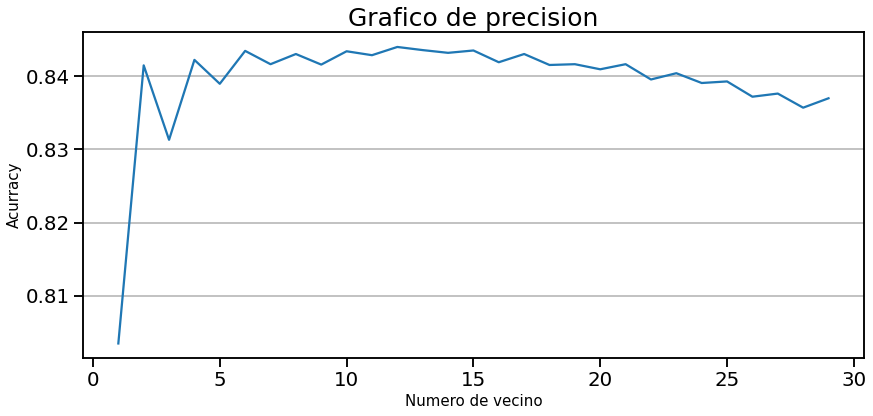

In [113]:
plt.figure(figsize=(14,6))
plt.plot(list(np.arange(1,30)), list(cvres['mean_test_score']));
plt.title("Grafico de precision", fontsize=25)
plt.xlabel("Numero de vecino", fontsize=15)
plt.ylabel("Acurracy", fontsize=15);
plt.grid(axis="y")

### 4.6.2 Optimizacion de bosque aleatorio

In [114]:
%%time
param_grid = [{'n_estimators':list(np.arange(40,320,40)),
               'bootstrap':[True],
               'oob_score':[True]
              }
]

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, 
                                return_train_score=True)

grid_search.fit(X_train, y_train)

CPU times: total: 7min 51s
Wall time: 7min 52s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True],
                          'n_estimators': [40, 80, 120, 160, 200, 240, 280],
                          'oob_score': [True]}],
             return_train_score=True)

In [115]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.88469565 0.88689036 0.88560563 0.88598039 0.88651565 0.88715808
 0.88656917] [{'bootstrap': True, 'n_estimators': 40, 'oob_score': True}, {'bootstrap': True, 'n_estimators': 80, 'oob_score': True}, {'bootstrap': True, 'n_estimators': 120, 'oob_score': True}, {'bootstrap': True, 'n_estimators': 160, 'oob_score': True}, {'bootstrap': True, 'n_estimators': 200, 'oob_score': True}, {'bootstrap': True, 'n_estimators': 240, 'oob_score': True}, {'bootstrap': True, 'n_estimators': 280, 'oob_score': True}]


### 6.6.2.2 Mejores parametros

In [116]:
cvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'bootstrap': True, 'n_estimators': 240, 'oob_score': True} 0.8871580794864024


### 6.6.2.2 Grafico de rendimiento versus numero de arboles

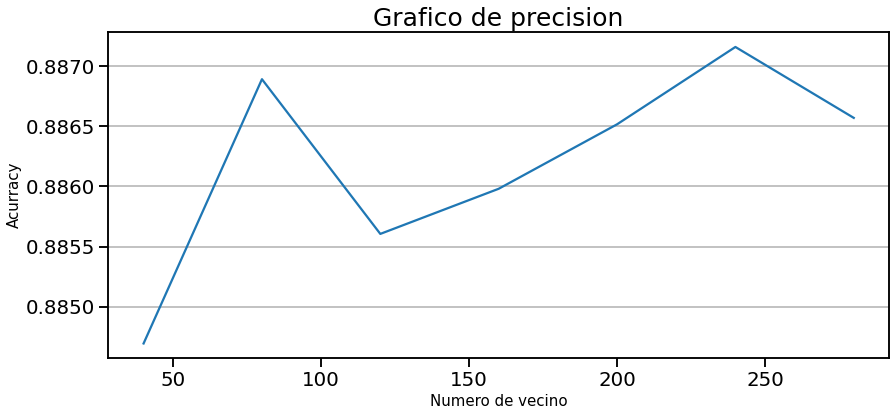

In [117]:
### 6.6.1.1 Mejores parametrosplt.figure(figsize=(14,6))
plt.plot(list(np.arange(40,320,40)), list(cvres['mean_test_score']));
plt.title("Grafico de precision", fontsize=25)
plt.xlabel("Numero de arboles", fontsize=15)
plt.ylabel("Acurracy", fontsize=15);
plt.grid(axis="y")

### 4.6.3 Optimizacion regresion logistica

In [118]:
%%time

param_grid = [{'C':[1,0,8,0.6,0,4,0.2,0.1],
               'penalty':['none','l1','l2','elasticnet'],
               'l1_ratio':[0.1,0.3,0.5],
              }]

log = LogisticRegression()
grid_search = GridSearchCV(log, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. G

CPU times: total: 57.4 s
Wall time: 14.4 s


C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py"

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0, 8, 0.6, 0, 4, 0.2, 0.1],
                          'l1_ratio': [0.1, 0.3, 0.5],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet']}],
             return_train_score=True)

In [119]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.76275386        nan 0.76270033        nan 0.76275386        nan
 0.76270033        nan 0.76275386        nan 0.76270033        nan
 0.76275386        nan        nan        nan 0.76275386        nan
        nan        nan 0.76275386        nan        nan        nan
 0.76275386        nan 0.76275386        nan 0.76275386        nan
 0.76275386        nan 0.76275386        nan 0.76275386        nan
 0.76275386        nan 0.76259328        nan 0.76275386        nan
 0.76259328        nan 0.76275386        nan 0.76259328        nan
 0.76275386        nan        nan        nan 0.76275386        nan
        nan        nan 0.76275386        nan        nan        nan
 0.76275386        nan 0.76270033        nan 0.76275386        nan
 0.76270033        nan 0.76275386        nan 0.76270033        nan
 0.76275386        nan 0.76216506        nan 0.76275386        nan
 0.76216506        nan 0.76275386        nan 0.76216506        nan
 0.76275386        nan 0.76173682        nan 0.76275386       

### 6.6.3.2 Mejores parametros

In [120]:
### 6.6.2.2 Mejores parametroscvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'C': 1, 'l1_ratio': 0.1, 'penalty': 'none'} 0.7627538636437867


### 4.6.4 Optimizacion Arbol de decisiones

In [ ]:
%%time
param_grid = [{'criterion':["gini", "entropía", "log_loss"],
               'splitter':["best", "random"],
               'min_samples_split':[1,2,5,10],
               'max_depth':[1,5,10,20,30,None] 
              }]

Arbol = DecisionTreeClassifier()
grid_search = GridSearchCV(Arbol, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

In [122]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[       nan        nan 0.83651836 0.64578984 0.83651836 0.64578984
 0.83651836 0.64525466        nan        nan 0.86547775 0.6887715
 0.86553129 0.67142832 0.86569189 0.6669352         nan        nan
 0.87522062 0.73620063 0.87575591 0.82720354 0.87522059 0.77790293
        nan        nan 0.83443035 0.82067358 0.8406399  0.84042584
 0.84336986 0.83801669        nan        nan 0.82233215 0.8144639
 0.8306831  0.83373493 0.83555428 0.84283455        nan        nan
 0.82126179 0.81055615 0.82988016 0.83507283 0.83716019 0.84213889
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        n

### 6.6.4.2 Mejores parametros

In [123]:
cvres1 = grid_search.best_params_
### 6.6.2.2 Mejores parametroscvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'splitter': 'best'} 0.8757559109982415


## 6.7 Validacion de los modelos

### 6.7.1 KNN

In [124]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
print('Accuracy', knn.score(X_val, y_val))

Accuracy 0.8436172870347239


In [125]:
validacion_knn=knn.predict(X_test)
print(classification_report(y_test, validacion_knn))

              precision    recall  f1-score   support

    Aprobado       0.82      0.97      0.89      2576
 Desaprobado       0.91      0.63      0.75      1428

    accuracy                           0.85      4004
   macro avg       0.87      0.80      0.82      4004
weighted avg       0.86      0.85      0.84      4004



<AxesSubplot:>

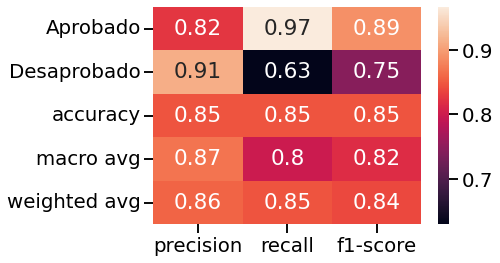

In [126]:
clf_report = classification_report(y_test,
                                   validacion_knn,
                                   #labels=labels,
                                   #target_names=target_names,
                                   output_dict=True)
sb.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

### 6.7.2 Bosque

In [127]:
reg = RandomForestClassifier(bootstrap= True, n_estimators=240, oob_score=True)
reg.fit(X_train, y_train)
print('Accuracy', reg.score(X_val, y_val))


Accuracy 0.8888333749687735


In [128]:
validacion_clf=reg.predict(X_test)
print(classification_report(y_test, validacion_clf))

              precision    recall  f1-score   support

    Aprobado       0.88      0.98      0.93      2576
 Desaprobado       0.95      0.75      0.84      1428

    accuracy                           0.90      4004
   macro avg       0.91      0.87      0.88      4004
weighted avg       0.90      0.90      0.89      4004



### 6.7.3 Reresion Logistica

In [129]:
log = LogisticRegression(penalty="none", l1_ratio=0.1,C= 1 )
log.fit(X_train, y_train)
print('Accuracy', log.score(X_val, y_val))


Accuracy 0.7739195603297527


C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


In [130]:
validacion_log=log.predict(X_test)
print(classification_report(y_test, validacion_log))

              precision    recall  f1-score   support

    Aprobado       0.76      0.97      0.85      2576
 Desaprobado       0.88      0.44      0.58      1428

    accuracy                           0.78      4004
   macro avg       0.82      0.70      0.72      4004
weighted avg       0.80      0.78      0.75      4004



### 6.7.4 Arbol de decisiones

In [131]:
Arbol = DecisionTreeClassifier(criterion='gini', min_samples_split= 5, splitter= 'best',max_depth= 10,  )
Arbol.fit(X_train, y_train)
print('Accuracy', Arbol.score(X_val, y_val))


Accuracy 0.8725955533349987


In [132]:
validacion_Arbol=Arbol.predict(X_test)
print(classification_report(y_test, validacion_Arbol))

              precision    recall  f1-score   support

    Aprobado       0.86      0.97      0.91      2576
 Desaprobado       0.94      0.71      0.81      1428

    accuracy                           0.88      4004
   macro avg       0.90      0.84      0.86      4004
weighted avg       0.89      0.88      0.88      4004



In [142]:
lista=x.columns.to_list()
lista[4]="Inversion"
x.columns.to_list()

['area',
 'año',
 'diferencia',
 'distancia',
 'investment',
 'type',
 'zona',
 'Monumento',
 'Parque',
 'Reserva',
 'Santuario']

Profundidad del árbol: 10
Número de nodos terminales: 259


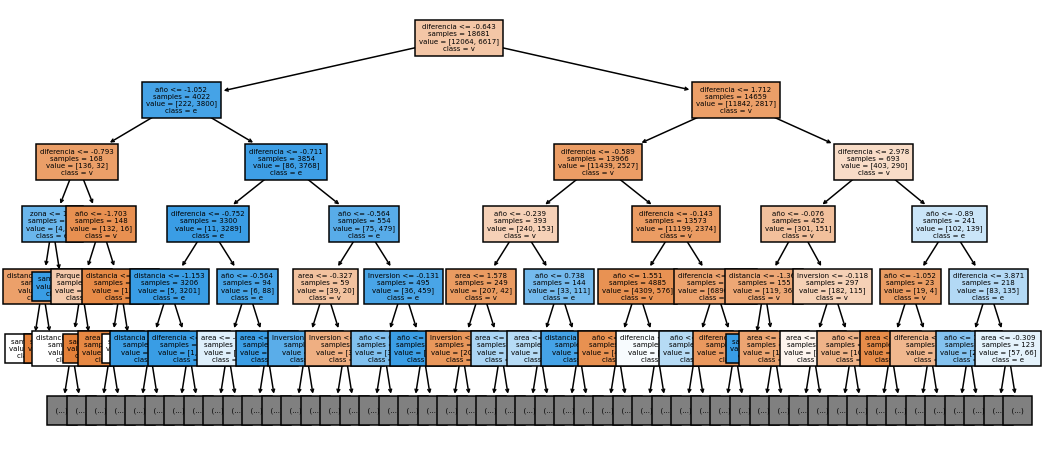

In [140]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 8))

print(f"Profundidad del árbol: {Arbol.get_depth()}")
print(f"Número de nodos terminales: {Arbol.get_n_leaves()}")

plot = plot_tree(
            decision_tree = Arbol,
           feature_names = lista,
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax,
            max_depth     =5
       )

## 6.8 Guardamos los modelos

In [143]:
import joblib
joblib.dump(knn,"C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_knn.pkl")
joblib.dump(reg,"C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_bosque.pkl")
joblib.dump(log,"C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_reglog.pkl")
joblib.dump(Arbol,"C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_Arbol.pkl")

['C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_Arbol.pkl']

In [81]:
knn2=joblib.load("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_knn.pkl")
knn2.score(X_val,y_val)

0.8843367474394205

In [82]:
df.to_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/avance2.xlsx")